In [1]:
import pandas as pd
import numpy as np

In [2]:
TCGA_mutation_df = pd.read_csv('final_tcga_data.csv')

In [3]:
TCGA_mutation_df.shape

(10560, 19788)

In [4]:
TCGA_mutation_df.head()

,A4GALT,ABCA13,ABCA5,ABCC4,ABRAXAS2,ACAN,ACTN4,ADAM28,AFF3,AGRN,...,KRTAP4-6,MIR29B2CHG,ZDHHC11B,AL445524.2,ZCCHC18,U82695.1,Z82198.2,SPATA24,AKAIN1,PRR23A
0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
columns_remove = []
for i in TCGA_mutation_df.columns:
    if sum(TCGA_mutation_df[i]) == 0:
        columns_remove.append(i)

In [6]:
len(columns_remove)

893

In [7]:
TCGA_mutation_df.drop(columns = columns_remove, inplace = True)
TCGA_mutation_df

,A4GALT,ABCA13,ABCA5,ABCC4,ABRAXAS2,ACAN,ACTN4,ADAM28,AFF3,AGRN,...,RNF222,ZNF729,FAM187A,MRGPRG,CD302,IGHD1-20,C11orf95,ZDHHC11B,AL445524.2,PRR23A
0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
mutations = []
gene_ids = []
gene2id = {}
id2gene = {}
for i in range(len(TCGA_mutation_df)):
    mutation = []
    gene_id = []
    for j in range(0, len(TCGA_mutation_df.columns)):
        gene = TCGA_mutation_df.columns[j]
        if TCGA_mutation_df.loc[i, gene] == 1:
            mutation.append(gene)
            gene_id.append(j)
            gene2id[gene] = j
            id2gene[j] = gene
    mutations.append(mutation)
    gene_ids.append(gene_id)

In [9]:
print(gene2id["NOTCH1"])
print(id2gene[1596])

1596
NOTCH1


In [10]:
from keras.preprocessing.sequence import skipgrams 
from keras.layers import *
from keras.layers.core import Dense, Reshape
from keras.layers import Embedding
from keras.models import Model,Sequential 

In [11]:
# Skip-Gram
from collections import defaultdict

geneFreq = defaultdict(int)

for sga in mutations:
    for gene in sga:
        geneFreq[gene] += 1

In [12]:
totalGenes = sum([freq**(3/4) for freq in geneFreq.values()])
geneProb = {gene:(freq)**(3/4)/totalGenes for gene, freq in geneFreq.items()}

In [13]:
import numpy as np

def generate_negative_sample(geneProb): # generate sample
    gene, context = (np.random.choice(list(geneProb.keys()), 
                     p=list(geneProb.values())) for _ in range(2))
    return gene, context

gene, context = generate_negative_sample(geneProb)

In [14]:
generate_negative_sample(geneProb)

('USP36', 'AHNAK')

In [15]:
import itertools

posTrainSet = []
X_gene_pos = []
X_context_pos = []
pos_examples_dict = {} ### remove duplicate

# add positive examples
for sga in mutations:
    for pair in itertools.combinations(sga, 2):
        pair_id = (gene2id[pair[0]], gene2id[pair[1]])
        if pair_id not in pos_examples_dict:
            pos_examples_dict[pair_id] = 1
            posTrainSet.append(pair_id)
            X_gene_pos.append(gene2id[pair[0]])
            X_context_pos.append(gene2id[pair[1]])=]
    # rev_sga = sga.copy() ### do not consider reverse order -> assume ascending order between two genes?
    # rev_sga.reverse()
    # for pair in itertools.combinations(rev_sga, 2):
    #     pair_id = [gene2id[pair[0]], gene2id[pair[1]]]
    #     posTrainSet.append(pair_id)
    #     X_gene_pos.append(gene2id[pair[0]])
    #     X_context_pos.append(gene2id[pair[1]])

n_pos_examples = len(posTrainSet)
y_pos = [1]*n_pos_examples]

In [16]:
posTrainSet[:10]

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 6),
 (1, 8),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 14),
 (1, 16)]

In [17]:
print(n_pos_examples)

157668939


In [18]:
n_neg_examples = 0
negTrainSet = []
X_gene_neg = []
X_context_neg = []

In [19]:
# while n_neg_examples < n_pos_examples:
#     (gene, context) = generate_negative_sample(geneProb) # generate a random pair of gene
#     # convert to indicies
#     gene, context = gene2id[gene], gene2id[context]
#     # if (gene, context) not in posTrainSet: # add into negative samples if the gene pair is not positive
#     # list -> dictionary (gene-pair-positive-check)
#     if (gene, context) not in pos_examples_dict:
#         negTrainSet.append((gene, context))
#         X_gene_neg.append(gene) 
#         X_context_neg.append(context)
#         n_neg_examples += 1
# y_neg = [0]*n_neg_examples

all_comb_examples = itertools.combinations(list(range(len(id2gene))), 2)
for pair in all_comb_examples: 
    pair_id = (pair[0], pair[1])
    if pair_id not in pos_examples_dict:
        negTrainSet.append(pair_id)
        X_gene_neg.append(pair[0])
        X_context_neg.append(pair[1])
        n_neg_examples += 1

In [20]:
print(n_neg_examples)

20832126


In [21]:
y_neg = [0]*n_neg_examples

In [22]:
X_gene = X_gene_pos.copy()
X_gene.extend(X_gene_neg)

X_context = X_context_pos.copy()
X_context.extend(X_context_neg)

X_all = [np.array(X_gene), np.array(X_context)]
y_all = y_pos.copy()
y_all.extend(y_neg)
y_all = np.array(y_all)

In [26]:
skip_grams = []
count = 0

In [27]:
import itertools
import random

for gene_id in gene_ids:
    count += 1
    if count % 500 == 0:
        print(count)
    pairs = []
    labels = []
    n_pos = 0
    for pair in itertools.combinations(gene_id, 2):
        pairs.append(list(pair))
        labels.append(1)
        n_pos += 1
    n_neg = min(len(negTrainSet), n_pos)
    negative_samples = random.sample(negTrainSet, n_neg)
    for pair in negative_samples:
        g_id, c_id = pair[0], pair[1]
        pairs.append(list((g_id, c_id)))
        labels.append(0)
    indices = np.arange(len(pairs))
    np.random.shuffle(indices)
    skip_grams.append([np.array(pairs)[indices], np.array(labels)[indices]])

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500


In [28]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
       id2gene[pairs[i][0]], pairs[i][0], 
       id2gene[pairs[i][1]], pairs[i][1], 
       labels[i])) 

(CALM1 (31), FAM174A (73)) -> 1
(KHDRBS1 (6048), UBE2T (15134)) -> 0
(BVES (26), TIGD5 (240)) -> 1
(ZNF549 (12065), IGKJ2 (18756)) -> 0
(GCM1 (341), PTGER1 (18164)) -> 0
(MCL1 (5460), FAM71F2 (14487)) -> 0
(ESRRG (69), H2BC13 (94)) -> 1
(ANKRD60 (7307), SEC61G (13551)) -> 0
(ANKRD34B (12), TNFRSF13C (244)) -> 1
(S100A6 (525), MED7 (9689)) -> 0


In [29]:
embed_size = 512
vocab_size = len(id2gene.items())+1
gene_model = Sequential()
gene_model.add(Embedding(vocab_size, embed_size,
                      embeddings_initializer="glorot_uniform",
                      input_length=1))
gene_model.add(Reshape((embed_size, )))
context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
               embeddings_initializer="glorot_uniform",
               input_length=1))
context_model.add(Reshape((embed_size,)))
merged_output = add([gene_model.output, context_model.output])  
model_combined = Sequential()
model_combined.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
final_model = Model([gene_model.input, context_model.input], model_combined(merged_output))
final_model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 embedding_1_input (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 512)       9674752     ['embedding_input[0][0]']        
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 512)       9674752     ['embedding_1_input[0][0]']      
                                                                                              

In [32]:
for epoch in range(1, 6): # change to 5 epoch
    loss = 0
    acc = []
    for i, elem in enumerate(skip_grams):
        if len(elem[0]) == 0:
            continue
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 1000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += final_model.train_on_batch(X,Y)[0] 
        acc.append(final_model.train_on_batch(X,Y)[1])
    print('Epoch:', epoch, 'Loss:', loss, 'Acc:', np.mean(acc)) 

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Processed 2000 (skip_first, skip_second, relevance) pairs
Processed 3000 (skip_first, skip_second, relevance) pairs
Processed 4000 (skip_first, skip_second, relevance) pairs
Processed 5000 (skip_first, skip_second, relevance) pairs
Processed 6000 (skip_first, skip_second, relevance) pairs
Processed 7000 (skip_first, skip_second, relevance) pairs
Processed 8000 (skip_first, skip_second, relevance) pairs
Processed 9000 (skip_first, skip_second, relevance) pairs
Processed 10000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 974.9228037411203 Acc: 0.9686873472252242
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Processed 2000 (skip_first, skip_second, relevance) pairs
Processed 3000 (skip_first, skip_second, relevance) pairs
Processed 4000 (skip_first, skip_second, relevance) pairs
Processed 5000 (skip

In [41]:
final_model.evaluate(X_all, y_all)

 461794/5578159 [=>............................] - ETA: 1:33:52 - loss: 0.3134 - accuracy: 0.9236

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5578159/5578159 [==============================] - 6131s 1ms/step - loss: 1.1232 - accuracy: 0.7254


[1.123178243637085, 0.7254015207290649]

In [42]:
from sklearn.metrics.pairwise import euclidean_distances
gene_embed_layer = gene_model.layers[0]
weights = gene_embed_layer.get_weights()[0][1:]
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)
similar_genes = {search_term: [id2gene[idx] for idx in distance_matrix[gene2id[search_term]-1].argsort()[1:6]+1] 
                for search_term in ['NOTCH1','NOTCH3']}
similar_genes

(18895, 18895)


{'NOTCH1': ['PLEKHH2', 'NBEAL2', 'ZEB1', 'DPYD', 'TIAM1'],
 'NOTCH3': ['PAPPA', 'RESF1', 'ADCY10', 'NOS1', 'HEATR1']}

In [43]:
weights.shape

(18895, 512)

In [44]:
gene_embeddings = weights
gene_embeddings = np.vstack([gene_embeddings, np.array(512*[0])])
gene_embeddings.shape

(18896, 512)

In [45]:
### sga_embeddings for 692 patients (324 genes)
mutations_324_df = pd.read_csv('/data/yingfei/cancer_data/mutations_raw_324_final.csv')

In [46]:
helper_dict = {'FAM123B': 'AMER1', 'FAM46C': 'TENT5C', 'C17orf39': 'GID4', 'H3F3A': 'H3-3A', 'MLL': 'KMT2A',
            'MLL2': 'KMT2D', 'MRE11A': 'MRE11', 'MYCL1': 'MYCL', 'PARK2': 'PRKN', 'WHSC1': 'NSD2', 'WHSC1L1': 'NSD3'}

mutations_324 = []
gene_ids_324 = []
for i in range(len(mutations_324_df)):
    mutation = []
    gene_id = []
    for j in range(0, len(mutations_324_df.columns)):
        gene = mutations_324_df.columns[j]
        if mutations_324_df.loc[i, gene] == 1:
            if gene not in gene2id:
                try:
                    gene = helper_dict[gene]
                except:
                    continue
            mutation.append(gene)
            gene_id.append(gene2id[gene])
    mutations_324.append(mutation)
    gene_ids_324.append(gene_id)

In [47]:
sga_embeddings_324 = []
for i in range(len(gene_ids_324)):
    sga_embeddings_324.append(np.array(np.sum(gene_embeddings[gene_ids_324[i]], axis = 0)))
sga_embeddings_324 = np.array(sga_embeddings_324)
sga_embeddings_324.shape

(692, 512)

In [48]:
sga_emb_df = pd.DataFrame(sga_embeddings_324)
sga_emb_df['ID'] = mutations_324_df['DepMap_ID']
sga_emb_df.to_csv('sga_embeddings_324_5_epoch.csv', index = False)
sga_emb_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,ID
0,-0.362202,-0.586266,0.139180,-0.127801,-2.586040,-0.054175,0.065738,0.514233,0.018695,-0.113106,...,-0.033273,-0.070953,-1.619924,0.299801,2.858873,-0.171646,-0.141969,-0.915412,0.133838,ACH-000001
1,-0.717887,0.070713,0.617696,-2.104818,-1.285899,1.326184,1.475216,0.770430,0.349486,-1.404817,...,1.384965,1.267564,-1.565154,-1.279005,0.899721,-1.135881,-1.066073,-0.475878,0.852605,ACH-000002
2,-1.159661,-0.713725,1.416716,-1.522582,-2.850033,1.427317,1.532997,1.917707,1.566452,-1.319724,...,2.352347,1.699534,-1.488194,-1.831902,2.959663,-1.555678,-1.713684,-1.205261,0.970185,ACH-000004
3,-0.956402,0.672616,0.036882,-0.537108,-0.233075,0.299495,0.493790,0.544051,-0.572997,-0.888538,...,0.524351,0.109228,-1.550470,-0.967902,1.202230,-0.329287,0.274682,-0.600241,0.164878,ACH-000006
4,3.630104,-1.515612,-1.710425,1.366670,0.620971,-2.677953,-2.587348,-1.894064,-2.625225,1.613703,...,-0.849270,-1.118107,0.206866,1.816973,0.015490,0.645605,-0.231878,0.585406,0.419384,ACH-000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,-0.058090,0.054889,-0.177387,0.653368,-0.078634,-0.763639,-0.367541,-0.074601,-0.721972,-0.158866,...,-0.395210,-0.849464,1.150169,0.348296,0.199203,0.958093,0.310445,0.864697,0.012624,ACH-001702
688,2.820207,3.610941,-0.087317,2.563586,2.696947,-4.059348,-3.283412,-2.507394,-3.979037,3.098980,...,-1.826811,-1.531010,2.744893,-1.743722,-0.474292,2.848888,0.860894,3.197819,0.367411,ACH-001703
689,-1.802442,-0.620997,1.909521,-3.166911,-4.162199,2.436656,2.593712,3.111435,2.749444,-1.864359,...,2.475012,1.955045,-2.645057,-2.396843,3.887387,-2.984352,-2.386035,-1.353391,1.554012,ACH-001711
690,1.310773,0.496882,-2.098062,1.388226,-0.822750,-0.306283,-0.467378,-0.389838,0.530294,-0.520984,...,-0.165496,0.389864,0.831680,-0.542283,0.025685,1.821224,0.554771,0.636499,-0.800050,ACH-001715


In [49]:
gene_ids_324[:3]

[[1596, 2832, 6057, 9454, 445, 3251, 4820],
 [2926, 17776, 2146, 4388, 3907],
 [78, 6639, 445, 15265]]

In [50]:
mutations_324[:3]

[['NOTCH1', 'NOTCH3', 'PIK3R1', 'PPP2R1A', 'TP53', 'TSC2', 'NSD3'],
 ['CDKN2A', 'CEBPA', 'KDM5C', 'NRAS', 'RPTOR'],
 ['FGFR3', 'POLE', 'TP53', 'ZNF703']]

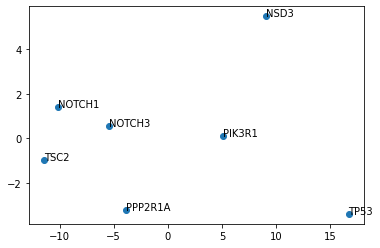

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
result = pca.fit_transform(gene_embeddings[[1596, 2832, 6057, 9454, 445, 3251, 4820]])

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(map(lambda x: id2gene[x], [1596, 2832, 6057, 9454, 445, 3251, 4820]))

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

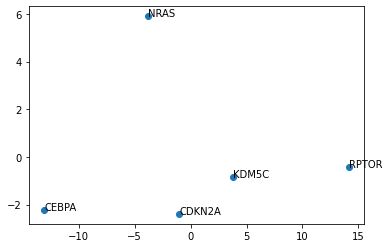

In [52]:
pca = PCA(n_components=2)
result = pca.fit_transform(gene_embeddings[[2926, 17776, 2146, 4388, 3907]])

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(map(lambda x: id2gene[x], [2926, 17776, 2146, 4388, 3907]))

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

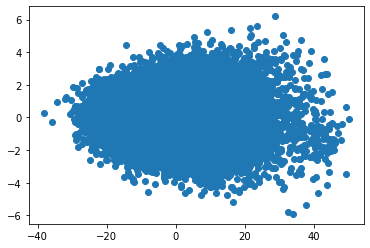

In [53]:
pca = PCA(n_components=2)
result = pca.fit_transform(gene_embeddings)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

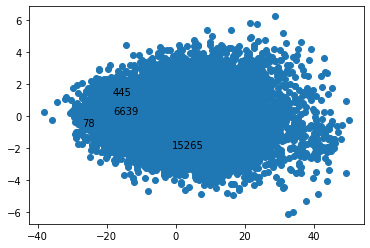

In [54]:
pca = PCA(n_components=2)
result = pca.fit_transform(gene_embeddings)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate([78, 6639, 445, 15265]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [55]:
len(id2gene)

18895

In [56]:
with open('idx2gene_5_epoch.txt', 'w') as f:
    f.write(str(id2gene))

In [57]:
with open('gene_emb_pretrain_5_epoch.npy', 'wb') as f:
    np.save(f, gene_embeddings)

In [58]:
np.load('gene_emb_pretrain_5_epoch.npy').shape

(18896, 512)